In [37]:
import pandas as pd 
df=pd.read_csv("C:\Files\dungaree.csv")

In [21]:
df.drop(['STOREID','SALESTOT'], axis=1, inplace=True)

In [22]:
df=df.dropna()

In [23]:
df

FASHION  LEISURE  STRETCH  ORIGINAL
0        182     1528      496      2203
1        129     2247      296      1890
2        107     1652      267      2342
3        117     1744      419      2119
4        110     1736      755      1781
..       ...      ...      ...       ...
684       62     1526      871      1956
685       57     1564        8      1769
686      104     1963      274      2053
687       51     2057      393      1901
688       97     2054      501      1826

[689 rows x 4 columns]

In [29]:
from sklearn import preprocessing
standardizeddf=preprocessing.scale(df)


In [30]:
standardizeddf

array([[ 2.75330253, -1.10791719,  0.24562839,  1.21352058],
       [ 1.12716676,  0.94293908, -0.69983508,  0.13938196],
       [ 0.45216701, -0.75422293, -0.83692728,  1.69053422],
       ...,
       [ 0.36012159,  0.13286511, -0.80383606,  0.69875766],
       [-1.26601418,  0.40098819, -0.2412853 ,  0.17713124],
       [ 0.14534894,  0.39243107,  0.26926498, -0.08025022]])

In [31]:
type(standardizeddf)

numpy.ndarray

In [26]:
df = pd.DataFrame(standardizeddf, columns=['FASHION', 'LEISURE','STRETCH','ORIGINAL']) 

In [32]:
df

FASHION   LEISURE   STRETCH  ORIGINAL
0    2.753303 -1.107917  0.245628  1.213521
1    1.127167  0.942939 -0.699835  0.139382
2    0.452167 -0.754223 -0.836927  1.690534
3    0.758985 -0.491805 -0.118375  0.925253
4    0.544212 -0.514624  1.470004 -0.234679
..        ...       ...       ...       ...
684 -0.928514 -1.113622  2.018372  0.365878
685 -1.081923 -1.005232 -2.061302 -0.275860
686  0.360122  0.132865 -0.803836  0.698758
687 -1.266014  0.400988 -0.241285  0.177131
688  0.145349  0.392431  0.269265 -0.080250

[689 rows x 4 columns]

In [33]:
from sklearn.cluster import KMeans
engine=KMeans(n_clusters=6)
engine.fit(df)

KMeans(n_clusters=6)

In [35]:
engine.predict(df)
cluster_labels=engine.predict(df)
Clusters=pd.DataFrame(cluster_labels, columns=['Cluster_Name'])

In [36]:
Clusters

Cluster_Name
0               3
1               3
2               1
3               1
4               0
..            ...
684             0
685             4
686             1
687             1
688             2

[689 rows x 1 columns]

In [38]:
df

STOREID  FASHION  LEISURE  STRETCH  ORIGINAL  SALESTOT
0          1      182     1528      496      2203      4409
1          2      129     2247      296      1890      4562
2          3      107     1652      267      2342      4368
3          4      117     1744      419      2119      4399
4          5      110     1736      755      1781      4382
..       ...      ...      ...      ...       ...       ...
684      685       62     1526      871      1956      4415
685      686       57     1564        8      1769      3398
686      687      104     1963      274      2053      4394
687      688       51     2057      393      1901      4402
688      689       97     2054      501      1826      4478

[689 rows x 6 columns]

In [39]:
Sonuc=pd.merge(df, Clusters, left_index=True, right_index=True)

In [40]:
Sonuc

STOREID  FASHION  LEISURE  STRETCH  ORIGINAL  SALESTOT  Cluster_Name
0          1      182     1528      496      2203      4409             3
1          2      129     2247      296      1890      4562             3
2          3      107     1652      267      2342      4368             1
3          4      117     1744      419      2119      4399             1
4          5      110     1736      755      1781      4382             0
..       ...      ...      ...      ...       ...       ...           ...
684      685       62     1526      871      1956      4415             0
685      686       57     1564        8      1769      3398             4
686      687      104     1963      274      2053      4394             1
687      688       51     2057      393      1901      4402             1
688      689       97     2054      501      1826      4478             2

[689 rows x 7 columns]

In [44]:
Sonuc.groupby('Cluster_Name').describe()

STOREID                                                       \
               count        mean         std   min     25%    50%     75%   
Cluster_Name                                                                
0              122.0  332.754098  206.636956   5.0  139.75  346.0  508.75   
1              181.0  349.071823  194.815355   3.0  181.00  339.0  528.00   
2              204.0  353.250000  195.079070   7.0  187.75  361.5  519.50   
3              126.0  365.563492  204.918149   1.0  194.00  373.0  544.00   
4               46.0  293.739130  194.089949  11.0  121.25  261.5  444.25   
5               10.0  229.100000  165.199173  14.0   75.75  233.0  376.00   

                    FASHION                                               \
                max   count        mean        std    min     25%    50%   
Cluster_Name                                                               
0             685.0   122.0   82.459016  22.702222   34.0   67.25   80.5   
1             688.0   181.0   84.508287  19.247978   42.0   70.00   85.0   
2             689.0   204.0   83.078431  22.176491   26.0   67.00   80.0   
3             682.0   126.0  138.904762  23.275542  101.0  120.25  133.5   
4             686.0    46.0   80.891304  28.923830   32.0   62.00   75.5   
5             450.0    10.0    4.200000   5.094660    1.0    1.25    2.5   

                            LEISURE                                            \
                 75%    max   count         mean         std     min      25%   
Cluster_Name                                                                    
0              95.75  159.0   122.0  1615.180328  212.219402  1057.0  1466.00   
1              99.00  135.0   181.0  1795.066298  189.818410  1184.0  1683.00   
2              97.25  149.0   204.0  2296.112745  202.050455  1913.0  2146.75   
3             155.00  204.0   126.0  1931.015873  213.148211  1416.0  1786.00   
4              97.75  147.0    46.0  1703.021739  189.006348  1358.0  1555.00   
5               4.75   18.0    10.0   840.000000  188.896797   650.0   674.75   

                                      STRETCH                                 \
                 50%      75%     max   count        mean         std    min   
Cluster_Name                                                                   
0             1619.0  1764.00  2021.0   122.0  757.385246  137.370191  579.0   
1             1828.0  1932.00  2150.0   181.0  394.303867  102.397762  140.0   
2             2252.0  2443.75  2929.0   204.0  407.289216  125.554728  113.0   
3             1941.5  2081.75  2532.0   126.0  434.261905  140.860168   11.0   
4             1700.0  1813.00  2231.0    46.0   26.347826   24.269979    2.0   
5              770.5  1045.00  1073.0    10.0  315.800000   74.405496  227.0   

                                           ORIGINAL                           \
                 25%    50%    75%     max    count         mean         std   
Cluster_Name                                                                   
0             657.50  718.5  824.5  1224.0    122.0  1943.475410  201.245839   
1             311.00  408.0  466.0   585.0    181.0  2129.933702  174.362700   
2             311.50  398.5  484.0   750.0    204.0  1616.299020  163.070820   
3             330.00  411.0  534.0   822.0    126.0  1893.396825  182.374870   
4               8.75   21.5   30.0   130.0     46.0  1585.108696  211.296130   
5             251.00  318.5  368.0   447.0     10.0  1039.600000  126.002822   

                                                       SALESTOT               \
                 min      25%     50%      75%     max    count         mean   
Cluster_Name                                                                   
0             1507.0  1806.75  1941.0  2055.75  2413.0    122.0  4398.500000   
1             1857.0  1999.00  2099.0  2237.00  2715.0    181.0  4403.812155   
2             1149.0  1503.75  1620.0  1741.25  1949.0    204.

In [43]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [45]:
import pandas as pd 
df=pd.read_csv("C:\Files\CEREALS.csv")

In [46]:
df

brand   weight  idnumber
0        Morning  14.9982  61469897
1   Rise n Shine  15.0136  33081197
2        Morning  15.0100  68137597
3   Rise n Shine  14.9982  37070397
4        Morning  15.0052  64608797
5   Rise n Shine  14.9930  60714297
6        Morning  14.9733  16907997
7   Rise n Shine  15.0812   9589297
8        Morning  15.0037  93891897
9   Rise n Shine  15.0418  85859397
10       Morning  14.9957  38152597
11  Rise n Shine  15.0639  99108497
12       Morning  15.0099  59666697
13  Rise n Shine  15.0613  70847197
14       Morning  14.9943  47613397
15  Rise n Shine  15.0255  53750297
16       Morning  14.9779  95948597
17  Rise n Shine  15.0176   3873197
18       Morning  14.9862  25756097
19  Rise n Shine  15.0122  43493297
20       Morning  14.9907  27543197
21  Rise n Shine  15.0122  26212897
22       Morning  14.9785   8945097
23  Rise n Shine  15.0322  51799397
24       Morning  15.0716  39196697
25  Rise n Shine  15.0164  48154497
26       Morning  14.9787  55189597
27  Rise n Shine  15.0093  46028397
28       Morning  14.9935  75332897
29  Rise n Shine  15.0156  29520797
30       Morning  15.0270  55983497
31  Rise n Shine  15.0393  93236497
32       Morning  14.9855   6975697
33  Rise n Shine  15.0298  29686297
34       Morning  14.9982  76815697
35  Rise n Shine  15.0204  64045497
36       Morning  15.0194   9880297
37  Rise n Shine  15.0633  23048597
38       Morning  14.9720  76058697
39  Rise n Shine  15.0464  42586897
40       Morning  14.9793  62688897
41  Rise n Shine  15.0858  73461797
42       Morning  15.0304  44327297
43  Rise n Shine  15.0418   2854197
44       Morning  15.0187  42401697
45  Rise n Shine  15.0101  51266697
46       Morning  15.0134  61195297
47  Rise n Shine  15.0580  71681397
48       Morning  14.9930  43230697
49  Rise n Shine  15.0550   6520097
50       Morning  14.9690  61728297
51  Rise n Shine  15.0500  64179097
52       Morning  14.9955  20494697
53  Rise n Shine  15.0868  40177297
54       Morning  15.0032  43183797
55  Rise n Shine  15.0196  47146397
56       Morning  14.9737  60633297
57  Rise n Shine  15.0413  72168497
58       Morning  15.0254  98377897
59  Rise n Shine  15.0267  20745097
60       Morning  14.9885  91775997
61  Rise n Shine  15.0374  82634897
62       Morning  15.0223  73772397
63  Rise n Shine  15.0437  20755897
64       Morning  15.0057  57288097
65  Rise n Shine  15.0194  55860697
66       Morning  15.0039  65246997
67  Rise n Shine  15.0623  81994397
68       Morning  14.9515  76526697
69  Rise n Shine  15.0980  23573597
70       Morning  14.9894  61160997
71  Rise n Shine  15.0234  23359697
72       Morning  15.0169  19108097
73  Rise n Shine  14.9831  30834797
74       Morning  14.9803  46806897
75  Rise n Shine  15.0435  62919297
76       Morning  14.9730  37534197
77  Rise n Shine  15.0497   4440297
78       Morning  14.9779   2012997
79  Rise n Shine  15.0096  59149297

In [47]:
df.groupby('brand').describe()

weight                                                  \
              count       mean      std      min       25%      50%   
brand                                                                 
Morning        40.0  14.997012  0.02201  14.9515  14.97915  14.9949   
Rise n Shine   40.0  15.035960  0.02655  14.9831  15.01620  15.0348   

                                 idnumber                            \
                    75%      max    count        mean           std   
brand                                                                 
Morning       15.009925  15.0716     40.0  51839254.5  2.539209e+07   
Rise n Shine  15.051250  15.0980     40.0  46185757.0  2.585565e+07   

                                                                         
                    min         25%         50%         75%         max  
brand                                                                    
Morning       2012997.0  37997997.0  56635797.0  65969647.0  98377897.0  
Rise n Shine  2854197.0  25553072.0  46587397.0  64078897.0  99108497.0

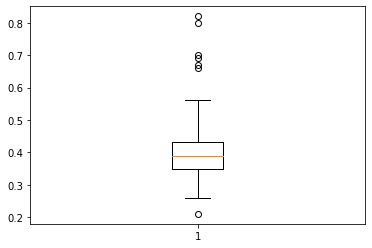

In [49]:
import matplotlib.pyplot as plot

L= [0.43,0.31,0.34,0.44,0.37,0.4,0.82,0.41,0.33,0.38,0.36,0.39,0.41,0.35,0.21,0.42,0.27,0.7,0.41,0.37,0.47,0.34,0.54,0.32,0.26,0.39,0.39,0.37,0.34,0.4,0.36,0.33,0.51,0.37,0.42,0.45,0.67,0.41,0.35,0.33,0.56,0.4,0.48,0.8,0.4,0.4,0.66,0.34,0.34,0.42,0.5,0.35,0.38,0.36,0.69,0.32]
plot.boxplot(L)
plot.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2397188a130>,
 'caps': [<matplotlib.lines.Line2D at 0x2397188a7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2397187ad90>],
 'medians': [<matplotlib.lines.Line2D at 0x2397188aeb0>],
 'fliers': [<matplotlib.lines.Line2D at 0x23971896250>],
 'means': []}

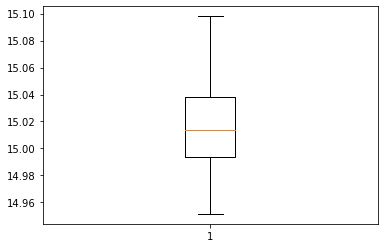

In [51]:
plot.boxplot(df.weight)

In [52]:
import scipy.stats as stats
stats.ttest_1samp(df.weight, popmean=15.00)

Ttest_1sampResult(statistic=4.731717801994585, pvalue=9.596150122547835e-06)

In [55]:
# Pandas içinde filtering 
Morning=df[df['brand']=='Morning']
RS=df[df['brand']=='Rise n Shine']

In [57]:
stat, prob = stats.f_oneway(Morning['weight'],RS['weight'])

In [58]:
stat, prob

(51.01661533127203, 4.212418952643984e-10)

In [61]:
# H0: Eşitlik, farksızlık 
#interpret 

alpha=0.05
if prob>alpha:
        print('2 örneklem birbirinden farklı değil, H0 Kabul')
else:
        print('2 marka birbirinden farklıdır, H0 Reddet')


2 marka birbirinden farklıdır, H0 Reddet


In [ ]:
tansu.tosun@ids-analytics.com 

In [ ]:
# Advertise datasını kullanarak satış kanallarını birbirleri ile karşılaşırınız. 

# Veriyi içeri al  
# Her bir kanal için 4 farklı altküme oluştur
# f_oneway testi ile 4 kanalı birbirleri ile kıyasla 


In [1]:
import numpy
numpy.version.version

'1.23.0'